In [28]:
from models import *
from utils import *
import torch
import torchinfo
import torchvision

%reload_ext autoreload
%autoreload 2

In [29]:
# load dataset
train_dataset = torchvision.datasets.MNIST(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
val_dataset = torchvision.datasets.MNIST(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, pin_memory=True)
model_name = 'VAE'
weights_dir = 'weights/MNIST'
history_dir = 'histories/MNIST'

os.makedirs(weights_dir, exist_ok=True)
os.makedirs(history_dir, exist_ok=True)

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

model = VariadicAE((1, 28, 28), 32, [512]).to(device)
torchinfo.summary(model, input_size=(1, 1, 28, 28))

opt = torch.optim.Adam(model.parameters())
loss_fn = BetaKLDivLoss()

history = train(model, device, train_loader, val_loader, opt, loss_fn, 50, model_name, weights_dir)
history.to_csv(os.path.join(history_dir, f'{model_name}.history.csv'))


Epoch 1: Train loss: -80.853503, Validation loss: -100.28945183105469
Epoch 2: Train loss: -101.423150, Validation loss: -105.04805178222657
Epoch 3: Train loss: -104.515301, Validation loss: -106.91840895996094
Epoch 4: Train loss: -106.011431, Validation loss: -107.87089791259766
Epoch 5: Train loss: -106.875947, Validation loss: -108.38220788574219
Epoch 6: Train loss: -107.440613, Validation loss: -108.8987564453125
Epoch 7: Train loss: -107.839145, Validation loss: -109.08692430419921
Epoch 8: Train loss: -108.134536, Validation loss: -109.2375349243164
Epoch 9: Train loss: -108.358315, Validation loss: -109.38060887451172
Epoch 10: Train loss: -108.555710, Validation loss: -109.61091810302734
Epoch 11: Train loss: -108.711399, Validation loss: -109.71679650878906
Epoch 12: Train loss: -108.845869, Validation loss: -109.80754598388671
Epoch 13: Train loss: -108.951106, Validation loss: -109.83131359863282
Epoch 14: Train loss: -109.065959, Validation loss: -109.95270432128906
Epoc

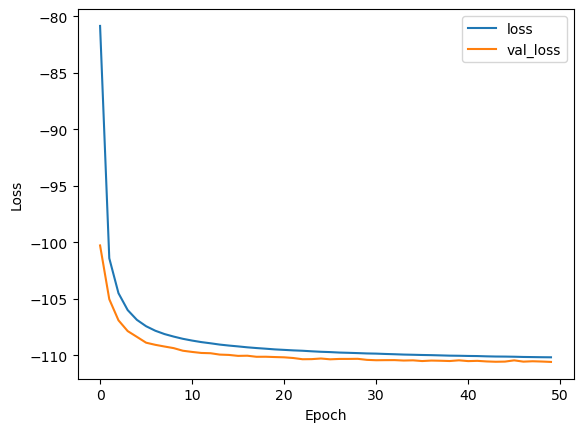

In [31]:
plot_history(model_name, history_dir)

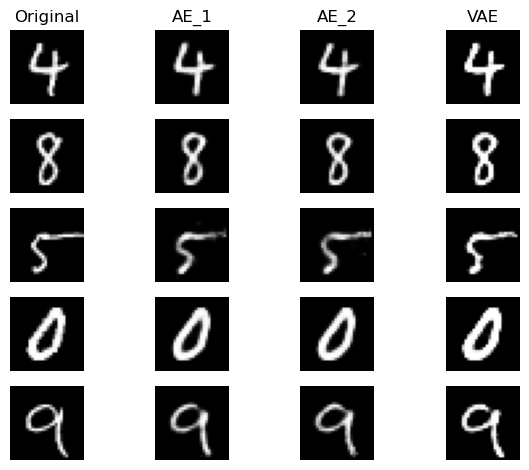

In [39]:
test_batch = next(iter(val_loader))[0][:5]
models = load_models('AE_1', 'AE_2', model_name, kind='best', model_dir=weights_dir)
show_examples(test_batch, models)